In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import grina
import matplotlib.pyplot as plt

In [2]:
fpath = os.path.join("..", "data", "unicorn_company_invester.csv")
df = pd.read_csv(fpath, converters={"Select Investors": lambda x: x.split(",")})

In [3]:
df.head()

,Company,Valuation($B),Date Joined,Country,Industry,Select Investors
0,100credit,$1,4/18/2018,China,Fintech,"[Sequoia Capital China, China Reform Fund, H..."
1,17zuoye,$1,3/7/2018,China,Edtech,"[DST Global, Temasek Holdings]"
2,23andMe,$2.50,7/3/2015,United States,Health,"[Google Ventures, New Enterprise Associates, ..."
3,4Paradigm,$2,12/19/2018,China,Artificial intelligence,"[Sequoia Capital China, China Construction Ba..."
4,58 Daojia,$1,10/12/2015,China,Internet software & services,"[KKR, Alibaba Group, Ping An Insurance]"


In [4]:
def clean(element):
    return element.strip()

In [5]:
r_comps, r_invests = [], []
for company, investors in df[["Company", "Select Investors"]].values.tolist():
    n_rows = len(investors)
    comps = np.full(n_rows, company)
    r_comps += comps.tolist()
    r_invests += investors
r_comps = list(map(clean, r_comps))
r_invests = list(map(clean, r_invests))

In [6]:
# Unicornで投資を行っている企業が存在するため、2部グラフにするためにInvester&Unicornの場合はInvester名に"_"を追加
for i, invest in enumerate(r_invests):
    if invest in r_comps:
        print(invest)
        r_invests[i] = invest + "_"

Didi Chuxing
Bitmain Technologies
Grab
Tokopedia


In [7]:
rdf = pd.DataFrame()
rdf["Company"] = np.array(r_comps)
rdf["Investors"] = np.array(r_invests)
rdf

,Company,Investors
0,100credit,Sequoia Capital China
1,100credit,China Reform Fund
2,100credit,Hillhouse Capital Management
3,17zuoye,DST Global
4,17zuoye,Temasek Holdings
...,...,...
1380,Zwift,True
1381,Zwift,Causeway Media Partners
1382,Zymergen,Data Collective
1383,Zymergen,True Ventures


In [8]:
B = nx.Graph()

In [9]:
B.add_nodes_from(rdf["Company"].unique().tolist(), bipartite=0)
B.add_nodes_from(rdf["Investors"].unique().tolist(), bipartite=1)

In [10]:
edges = [(comp, inve) for comp, inve in zip(rdf["Company"], rdf["Investors"])]
B.add_edges_from(edges)

In [11]:
from networkx.algorithms import bipartite
company_graph = bipartite.projected_graph(B, set(rdf["Company"].tolist()))
investor_graph = bipartite.projected_graph(B, set(rdf["Investors"].tolist()))

In [12]:
company_graph_pd = nx.to_pandas_edgelist(company_graph)

In [13]:
investor_graph_pd = nx.to_pandas_edgelist(investor_graph)

In [14]:
bipartite_graph_pd = nx.to_pandas_edgelist(B)

In [15]:
print("ファイルを出力しますか？[y/n]")
b = input()
if b == "y":
    bipartite_graph_pd.to_csv(os.path.join("..", "out", "bipartite_graph.csv"))
    company_graph_pd.to_csv(os.path.join("..", "out", "company_graph.csv"))
    investor_graph_pd.to_csv(os.path.join("..", "out", "investor_graph.csv"))
    print("Done!!")

ファイルを出力しますか？[y/n]
y
Done!!


# 中心性
## 投資家のグラフ

In [16]:
degrees = nx.degree_centrality(investor_graph)
betweens = nx.betweenness_centrality(investor_graph)
eigens = nx.eigenvector_centrality(investor_graph)
closeness = nx.closeness_centrality(investor_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [17]:
investor_centrality_df = pd.DataFrame.from_dict(centra_dict)
investor_centrality_df

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
One Equity Partners,0.000000,0.000000,1.888047e-27,0.000000
Kefa Capital,0.002882,0.000000,4.713522e-05,0.120325
SAIF Partners China,0.005764,0.001391,1.405586e-02,0.189809
NewSpring Holdings,0.002882,0.000000,1.777468e-16,0.002882
IDG Capital Partners,0.004323,0.002096,1.486945e-03,0.155248
...,...,...,...,...
Global Asset Capital,0.002882,0.000000,1.587806e-02,0.195152
Public Investment Fund of Saudi Arabia,0.002882,0.000000,2.157199e-04,0.131052
European Founders Fund,0.002882,0.000000,2.086043e-03,0.157713
Beijing Shuju Xinrong Fund,0.001441,0.000000,1.583809e-20,0.001441


In [18]:
investor_centrality_df.sort_values(by="Degree Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Sequoia Capital China,0.063401,0.084700,1.923119e-01,0.268619
Sequoia Capital,0.054755,0.053202,2.589277e-01,0.264940
Andreessen Horowitz,0.050432,0.073885,2.491662e-01,0.276710
New Enterprise Associates,0.048991,0.064035,2.037530e-01,0.269013
SoftBank Group,0.044669,0.038367,1.822631e-01,0.259148
...,...,...,...,...
ICG,0.000000,0.000000,1.888047e-27,0.000000
Kuang-Chi,0.000000,0.000000,1.888047e-27,0.000000
Pacific Century Group,0.000000,0.000000,1.888047e-27,0.000000
Inflexion Private Equity,0.000000,0.000000,1.888047e-27,0.000000


Sequoia Capitalが最も他の投資家と一緒にユニコーン企業に投資を行っている。

In [19]:
investor_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Sequoia Capital China,0.063401,0.084700,1.923119e-01,0.268619
Andreessen Horowitz,0.050432,0.073885,2.491662e-01,0.276710
Goldman Sachs,0.040346,0.068284,1.352589e-01,0.272605
New Enterprise Associates,0.048991,0.064035,2.037530e-01,0.269013
Sequoia Capital,0.054755,0.053202,2.589277e-01,0.264940
...,...,...,...,...
EQT Partners,0.000000,0.000000,1.888047e-27,0.000000
QiMing Venture Partnersl,0.001441,0.000000,7.462515e-03,0.183277
Blackbird Ventures,0.002882,0.000000,2.459353e-02,0.203360
EXOR Seeds,0.002882,0.000000,1.777468e-16,0.002882


Sequoia Capital Chainaが最も媒介性が高かった。他の投資家同士を繋げることができるという解釈？

In [20]:
investor_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Andreessen Horowitz,0.050432,0.073885,2.491662e-01,0.276710
Goldman Sachs,0.040346,0.068284,1.352589e-01,0.272605
New Enterprise Associates,0.048991,0.064035,2.037530e-01,0.269013
Sequoia Capital China,0.063401,0.084700,1.923119e-01,0.268619
Google Ventures,0.037464,0.032141,2.144290e-01,0.266091
...,...,...,...,...
CPP Investment Board,0.000000,0.000000,1.888047e-27,0.000000
N/A,0.000000,0.000000,1.888047e-27,0.000000
Rhone Capital,0.000000,0.000000,1.888047e-27,0.000000
ICG,0.000000,0.000000,1.888047e-27,0.000000


## 企業のネットワーク


In [21]:
degrees = nx.degree_centrality(company_graph)
betweens = nx.betweenness_centrality(company_graph)
eigens = nx.eigenvector_centrality(company_graph)
closeness = nx.closeness_centrality(company_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [22]:
company_centrality_df = pd.DataFrame.from_dict(centra_dict)
company_centrality_df

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Amplitude,0.040,0.004746,0.013149,0.329945
Avant,0.006,0.000016,0.001550,0.250262
Yuanfudao,0.072,0.002575,0.116305,0.306565
Mofang Living,0.014,0.006637,0.006681,0.248644
Attentive Mobile,0.050,0.005099,0.024285,0.309029
...,...,...,...,...
AvidXchange,0.022,0.000909,0.005634,0.277333
Instabase,0.098,0.018141,0.038862,0.360909
HeartFlow,0.002,0.000000,0.000353,0.217817
Roblox,0.028,0.001624,0.007347,0.299146


In [23]:
company_centrality_df.sort_values(by="Degree Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Airwallex,0.108,0.019332,2.064184e-01,0.359784
Rappi,0.106,0.018043,6.203869e-02,0.363945
Miaoshou Doctor,0.098,0.007406,1.994774e-01,0.329945
Instabase,0.098,0.018141,3.886232e-02,0.360909
Luoji Siwei,0.098,0.007406,1.994774e-01,0.329945
...,...,...,...,...
Yanolja,0.000,0.000000,1.490423e-107,0.000000
Course Hero,0.000,0.000000,1.490423e-107,0.000000
ZipRecruiter,0.000,0.000000,1.490423e-107,0.000000
Oxford Nanopore Technologies,0.000,0.000000,1.490423e-107,0.000000


In [24]:
company_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Automation Anywhere,0.092,0.029788,3.621850e-02,0.368596
Ziroom,0.088,0.028290,1.554077e-01,0.336358
Klook,0.090,0.021153,1.624943e-01,0.347153
SHEIN,0.088,0.020892,1.553881e-01,0.339992
Discord,0.076,0.020490,9.198387e-02,0.352815
...,...,...,...,...
OrCam Technologies,0.006,0.000000,2.929408e-04,0.226661
TuJia,0.018,0.000000,1.086636e-02,0.276447
Forter,0.002,0.000000,5.778221e-04,0.235450
OVH,0.016,0.000000,5.200642e-03,0.261414


In [25]:
company_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Automation Anywhere,0.092,0.029788,3.621850e-02,0.368596
Rappi,0.106,0.018043,6.203869e-02,0.363945
Robinhood,0.084,0.010990,4.766014e-02,0.363563
Instabase,0.098,0.018141,3.886232e-02,0.360909
Airwallex,0.108,0.019332,2.064184e-01,0.359784
...,...,...,...,...
PolicyBazaar,0.000,0.000000,1.490423e-107,0.000000
About You,0.000,0.000000,1.490423e-107,0.000000
OVO Energy,0.000,0.000000,1.490423e-107,0.000000
KKW Beauty,0.000,0.000000,1.490423e-107,0.000000


## 企業メモ
* Pony.aiは自動運転自動車の会社
* Ziroomは賃貸掲載サイトの運営会社（スーモやホームズみたいなサイトの中国版？）
* Rappiはコロンビアの会社で、買い物代行。Uber eatに近いサービスだと思う。

# コンポーネント

In [26]:
n_comps = nx.number_connected_components(investor_graph)
print("コンポーネント数: {}".format(n_comps))
print("ノード数に対するコンポーネント数の割合: {0:.2%}".format(n_comps / len(investor_graph)))

コンポーネント数: 82
ノード数に対するコンポーネント数の割合: 11.80%


In [27]:
S = [investor_graph.subgraph(c).copy() for c in nx.connected_components(investor_graph)]

投資家コンポーネント上位10件のサイズ
[506   7   4   3   3   3   3   3   3   3]


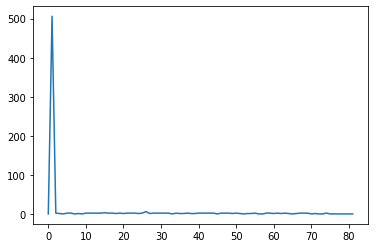

In [28]:
comp_sizes = [len(s) for s in S]
print("投資家コンポーネント上位10件のサイズ")
print(np.sort(comp_sizes)[::-1][:10])
plt.plot(comp_sizes)

In [32]:
comp_sizes

[1,
 506,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 7,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

投資家の大きな集団が存在する。

In [29]:
print("ネットワーク密度: {0:.2%}".format(nx.density(S[0])))

ネットワーク密度: 0.00%


ネットワーク密度は1%に満たない。

# データの出力

In [30]:
investor_centrality_df.to_csv(os.path.join("..", "out", "investor_centrality.csv"))
company_centrality_df.to_csv(os.path.join("..", "out", "company_centrality.csv"))

In [33]:
pd.DataFrame(S[1].nodes).to_csv(os.path.join("..", "out", "largest_investor_component.csv"), index=False, header=False)